# Project: Communicate Data Findings [Fifa GoBike System Data]

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#engineering">Feature Engineering</a></li>
    <li><a href="#uni">Univariate Exploration</a></li>
    <li><a href="#bi">Bivariate Exploration</a></li>
    <li><a href="#multi">Multivariate Exploration</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Fifa GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id='wrangling'></a>
## Data Wrangling

>Importing the Necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\zizo\Downloads\Data Visualization\201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### We find that the start_time and the end_time isn't a datetime object, and there are some NaN values in some columns so we need some data cleaning.

## Data Cleaning
> Converting the start time, end time from string to datetime.

> Converting bike_share_for_all_trip from string to boolean.

> Handling the NaN Values

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [7]:
df['bike_share_for_all_trip'] = (df['bike_share_for_all_trip'] == "Yes")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Checking and Fixing NaN Values

In [9]:
df.isna().sum().sum()

17318

In [10]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum().sum()

0

In [13]:
df.shape

(174952, 16)

#### Dropping the NaN Values doesn't affect our data so much.

In [14]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a id='engineering'></a>
## Feature Engineering
> Creating col for uses' ages.

> Creating columns for Start day, weekday, and hour

> Creating a new column that check if the end station is the same as the start station or not

In [15]:
# Calculating the user age related to fixed year 2019
df['age'] = (2019 - df['member_birth_year'])

# Getting the data from start_time
df['start_day'] = df['start_time'].dt.day

# In weekday 0 refers to Monday, and 6 refers to sunday.
df['start_weekday'] = df['start_time'].dt.weekday
df['start_hour'] = df['start_time'].dt.hour

In [16]:
df['station'] = (df['start_station_id'] == df['end_station_id'])

In [17]:
# Looking on the data after Creating the new columns
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day,start_weekday,start_hour,station
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,35.0,28,3,17,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,47.0,28,3,12,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,False,30.0,28,3,17,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,True,45.0,28,3,23,False
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,False,60.0,28,3,23,False


<a id='uni'></a>
## Univariate Exploration

In [18]:
def get_bins(maxValue, minValue, numOfValues):
    """
    get_bins function takes 3 arguments maxValue, minValue, numOfValues
    and uses Sturgis rule to calculate the number of bins, then uses 
    the number of bins to create the bins using numpy
    
    Args: 
     - maxValue: which is the max value in the series.
     - minValue: which is the min value in the series.
     - numOfValues: which is the number of rows in the series.
    
    return: numpy array have the splitted bins
    """
    binsNum = math.ceil(1 + 3.3*math.log(numOfValues))
    step = (maxValue - minValue)/binsNum
    arr = np.arange(minValue, maxValue + step, step)
    return arr

### What's the most age in the dataset?

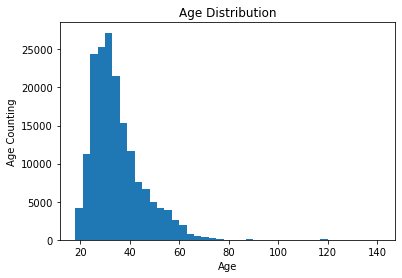

In [19]:
bins_age = get_bins(df['age'].max(), df['age'].min(), len(df['age']))
plt.hist(data=df, x='age', bins=bins_age)
plt.xlabel("Age")
plt.ylabel("Age Counting")
plt.title("Age Distribution");

#### As expected, the age has a range from 22 to 36 which related to the age of the workers, and the mean age is 35.

### What's the most trip duration in the dataset?

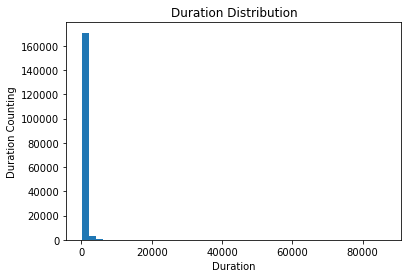

In [20]:
bins_duration = get_bins(df['duration_sec'].max(), df['duration_sec'].min(), len(df['duration_sec']))
plt.hist(data=df, x='duration_sec', bins=bins_duration);
plt.xlabel("Duration")
plt.ylabel("Duration Counting")
plt.title("Duration Distribution");

#### We see here that most of the data on about 5000, so we will pass 3*std alternative of the max value to remove the outliers from the curve

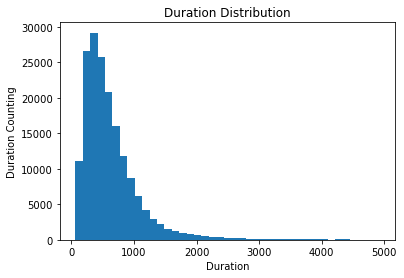

In [21]:
maxValue = 3*df['duration_sec'].std()
bins_duration = get_bins(maxValue, df['duration_sec'].min(), len(df['duration_sec']))
plt.hist(data=df, x='duration_sec', bins=bins_duration);
plt.xlabel("Duration")
plt.ylabel("Duration Counting")
plt.title("Duration Distribution");

#### The average trip duration is ranged from 200 to 2000 sec.

### What's the most types of people in the dataset?

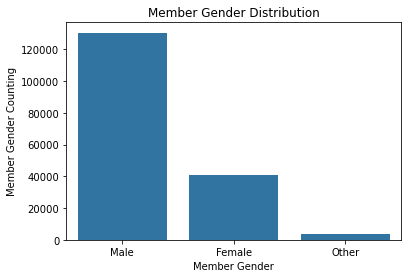

In [22]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x='member_gender', color=base_color, order=['Male', 'Female', 'Other']);
plt.xlabel("Member Gender")
plt.ylabel("Member Gender Counting")
plt.title("Member Gender Distribution");

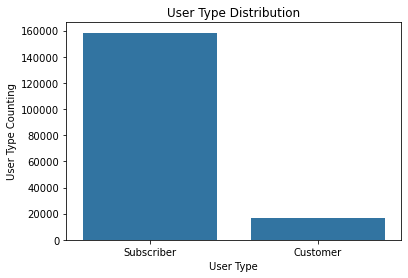

In [23]:
sb.countplot(data = df, x='user_type', color=base_color, order=['Subscriber', 'Customer'])
plt.xlabel("User Type")
plt.ylabel("Number of times of the user type")
plt.title("User Type Distribution");
plt.xlabel("User Type")
plt.ylabel("User Type Counting");

#### As expected, the most of the people are males and the most are subscribers.

### Which day and hour has the most and the least trip count? 

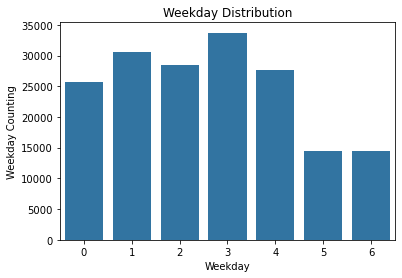

In [24]:
sb.countplot(data = df, x='start_weekday', color=base_color)
plt.xlabel("Weekday")
plt.title("Weekday Distribution");
plt.ylabel("Weekday Counting");

#### We saw here that 3 (thursday) is the most day of rides

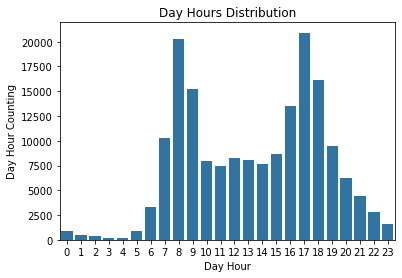

In [25]:
sb.countplot(data = df, x='start_hour', color=base_color)
plt.title("Day Hours Distribution");
plt.xlabel("Day Hour")
plt.ylabel("Day Hour Counting");

#### We saw here that 8, 9 and 17, 18 is the most hour for starting rides, which expected because its work times.

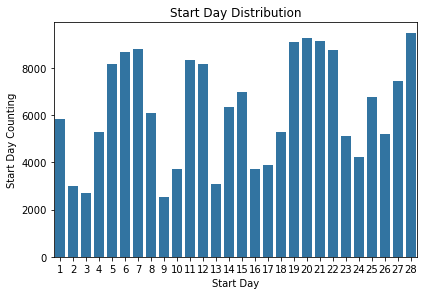

In [26]:
sb.countplot(data = df, x='start_day', color=base_color)
plt.tight_layout()
plt.xlabel("Start Day")
plt.ylabel("Start Day Counting")
plt.title("Start Day Distribution");

#### Here, we saw that the last days of February especially 28 is the most day of rides.

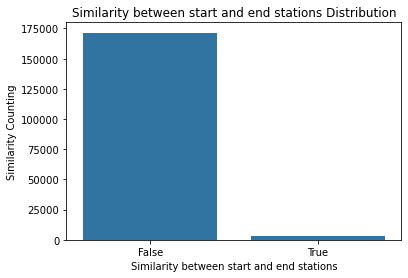

In [27]:
sb.countplot(data = df, x='station', color=base_color);
plt.xlabel("Similarity between start and end stations")
plt.ylabel("Similarity Counting")
plt.title("Similarity between start and end stations Distribution");

#### Here, we saw that the end station usually is not the same as the start station.

<a id='bi'></a>
## Bivariate Exploration

### Distribution of duration_sec VS day hour

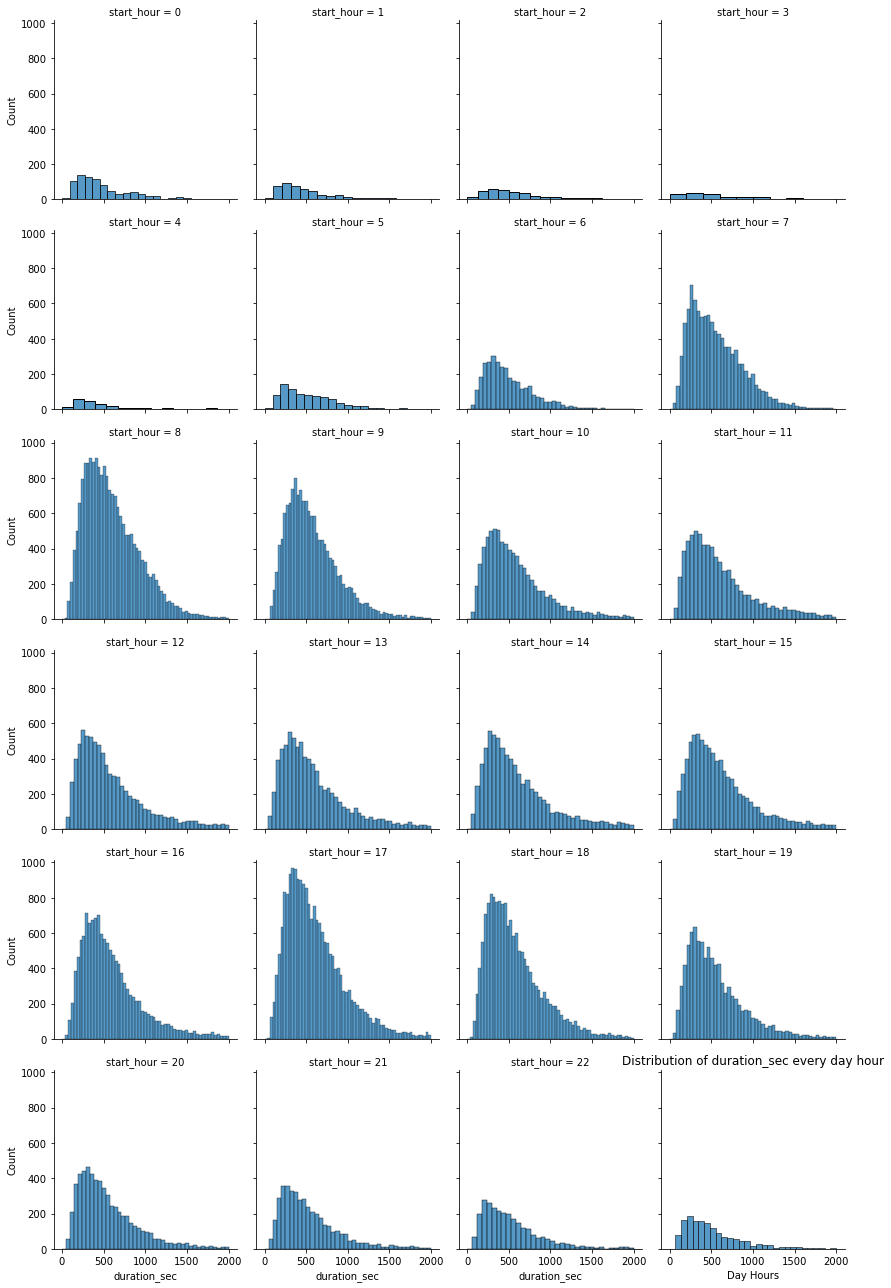

In [28]:
g = sb.FacetGrid(data=df, col='start_hour', col_wrap=4)
g.map(sb.histplot, 'duration_sec',  binrange=(0, 2000));
plt.title("Distribution of duration_sec every day hour");
plt.xlabel("Day Hours")
plt.ylabel("Duration in each day hour counting");

### what is the relation between age and duration?

#### First, Calculating the corrolation coeff

In [29]:
np.corrcoef(df['age'], df['duration_sec'])

array([[1.        , 0.00604117],
       [0.00604117, 1.        ]])

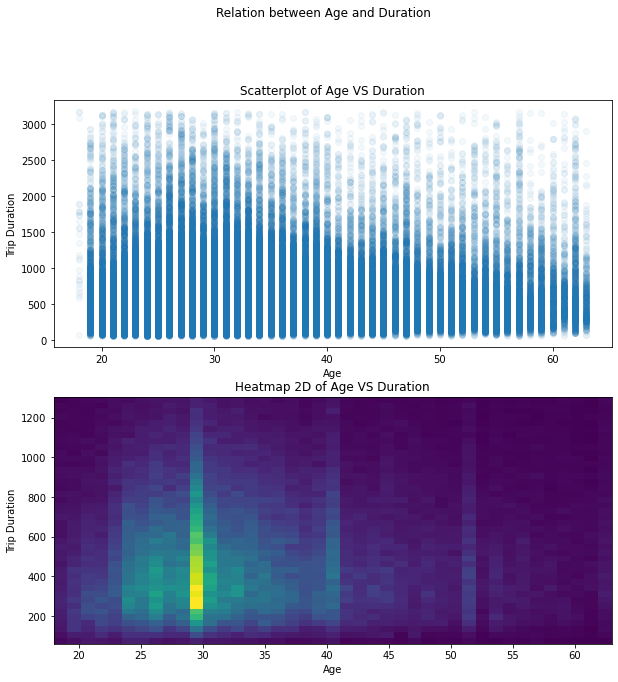

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.suptitle("Relation between Age and Duration", y = 1.01)

data = df.query('duration_sec<duration_sec.quantile(0.99) and age<age.quantile(0.99)')
ax[0].scatter(data=data, x='age', y='duration_sec', alpha=0.05)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Trip Duration")
ax[0].set_title("Scatterplot of Age VS Duration")


bins_x = get_bins(data['age'].max(), 
                  data['age'].min(), len(data['age']))
bins_y = get_bins(3*data['duration_sec'].std(), 
                  data['duration_sec'].min(), len(data['duration_sec']))
ax[1].hist2d(data=data, x='age', y='duration_sec', bins=[bins_x, bins_y]);
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Trip Duration")
ax[1].set_title("Heatmap 2D of Age VS Duration");

#### As Expected the corrolation is about very low, which means that the age doesn't affect the duration so much.

### what is the relation between user_type and duration? 

In [31]:
df.groupby('user_type')['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,16566.0,1310.656103,3399.899962,62.0,498.0,780.0,1230.0,83519.0
Subscriber,158386.0,640.551305,1314.319131,61.0,312.0,490.0,750.0,84548.0


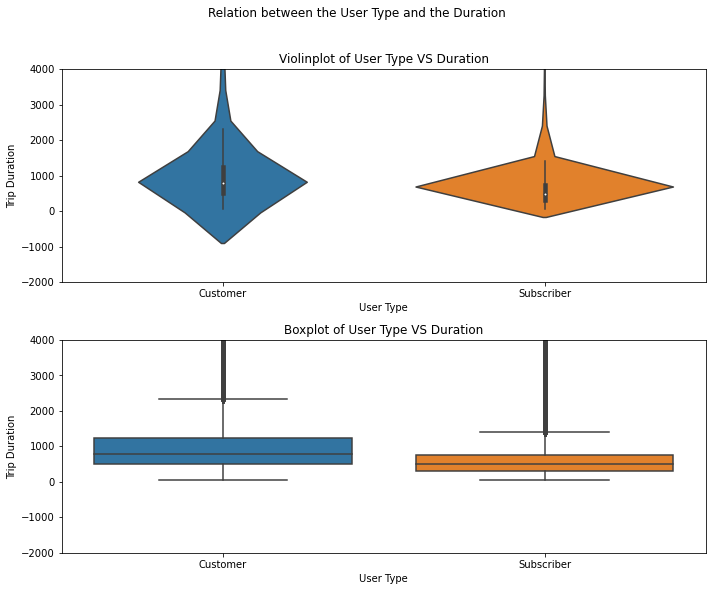

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle("Relation between the User Type and the Duration", y = 1.02)

sb.violinplot(ax = ax[0], data=df, x='user_type', y='duration_sec');
ax[0].set_ylim((-2000, 4000))
ax[0].set_xlabel("User Type")
ax[0].set_ylabel("Trip Duration")
ax[0].set_title("Violinplot of User Type VS Duration")

sb.boxplot(ax = ax[1], data=df, x='user_type', y='duration_sec');
ax[1].set_ylim((-2000, 4000))
ax[1].set_xlabel("User Type")
ax[1].set_ylabel("Trip Duration")
ax[1].set_title("Boxplot of User Type VS Duration");
fig.tight_layout()

#### We can see that on average that customers do longer trips than subscribers

### what is the relation between member_gender and the duration?

In [33]:
df.groupby('member_gender')['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40805.0,778.872761,1787.003612,61.0,361.0,567.0,864.0,83195.0
Male,130500.0,672.394851,1504.794560,61.0,311.0,493.0,761.0,84548.0
Other,3647.0,997.328489,3526.245996,63.0,344.0,556.0,874.5,82512.0


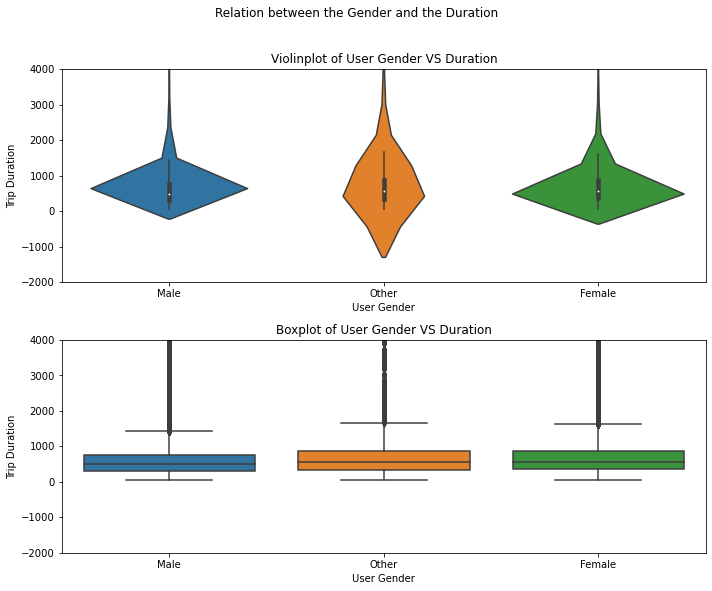

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle("Relation between the Gender and the Duration", y = 1.02)
             
sb.violinplot(ax = ax[0], data=df, x='member_gender', y='duration_sec');
ax[0].set_ylim((-2000, 4000))
ax[0].set_xlabel("User Gender")
ax[0].set_ylabel("Trip Duration")
ax[0].set_title("Violinplot of User Gender VS Duration")

sb.boxplot(ax = ax[1], data=df, x='member_gender', y='duration_sec');
ax[1].set_ylim((-2000, 4000))
ax[1].set_xlabel("User Gender")
ax[1].set_ylabel("Trip Duration")
ax[1].set_title("Boxplot of User Gender VS Duration");
fig.tight_layout()

#### We can see that on averageof the 3 types is almost the same, but females has the highest trip duration.

<a id='multi'></a>
## Multivariate Exploration

### What's the relation between gender type, weekdays and duration in sec?

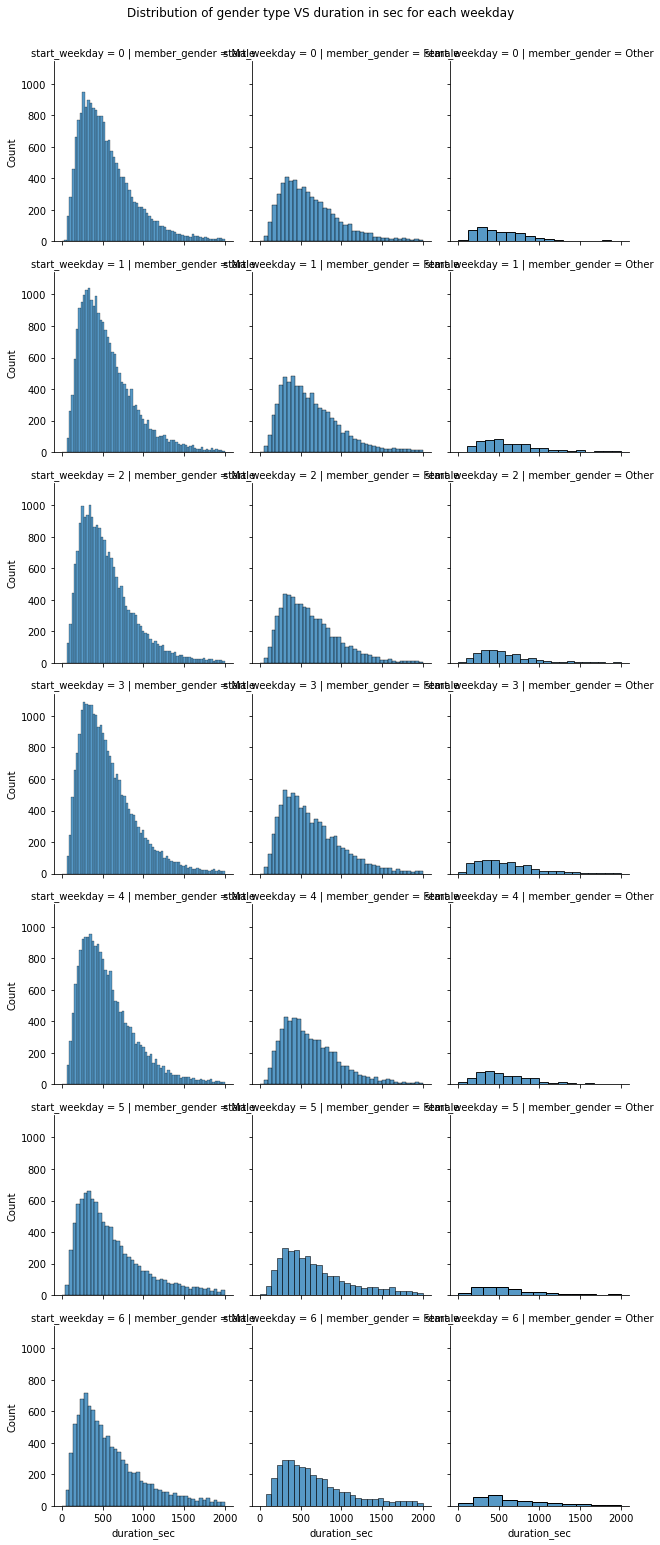

In [35]:
g = sb.FacetGrid(data=df, row='start_weekday',col='member_gender', col_order=['Male', 'Female', 'Other'])
g.map(sb.histplot, 'duration_sec', binrange=(0, 2000));
plt.tight_layout()
g.fig.suptitle("Distribution of gender type VS duration in sec for each weekday", y=1.02);

### What's the relation between member_gender, age, and duration in sec?

Text(0.5, 1.02, "Duration distribution of members' genders ages")

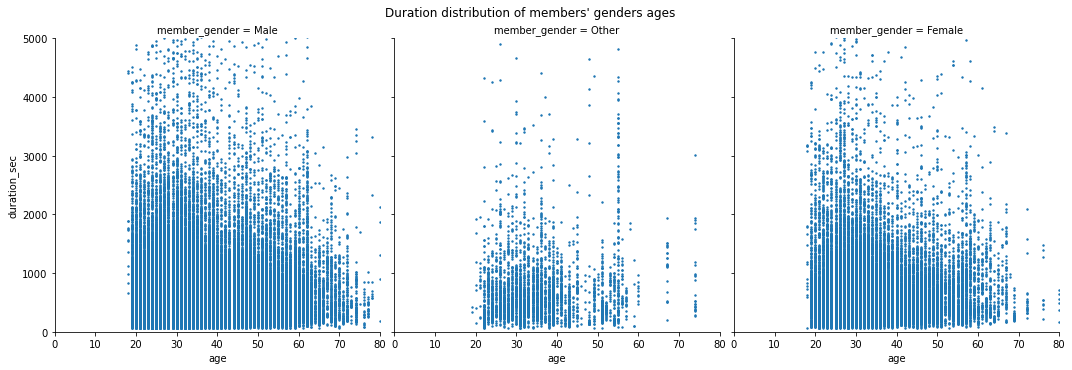

In [36]:
g = sb.FacetGrid(data=df, col='member_gender', col_wrap=3, height=5);
g.map(plt.scatter, 'age', 'duration_sec', s=2);
g.set(ylim=(0, 5000), xlim=(0, 80));
g.fig.suptitle("Duration distribution of members' genders ages", y=1.02)

#### As Expected, in the high ages males spend much duration than females and other types.

<a id='conclusions'></a>
## Conclusions

We can conclude that:
 - Customers do longer trips than subscribers.
 - Females - in general -  do longer trips than males and others.
 - Older males do longer trips than females and others.
 - Most trips are on Tuesday and Wednesday, and the less is on the weekend days.
 - Most trips are during the hours of going to work and returning from the work.